<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [7]:
import numpy as np
L = 1
g = 9.81
dt = 0.002
w0 = 0
p0 = (np.pi)/4
# Das numpy-Paket wird importiert und die Variablen definiert. Dann werden leere Listen definiert, die dann mit den berechneten Werten gefüllt werden.
wlist = []
plist = []
# Durch eine for-Schleife werden die Werte einzeln berechnet und dann an die Liste angehängt.
for i in range(3000):
    pi = p0 + w0 * dt
    wi = w0 - (g/L) * np.sin(p0) * dt
    plist.append(pi)
    wlist.append(wi)
    p0 = pi
    w0 = wi

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


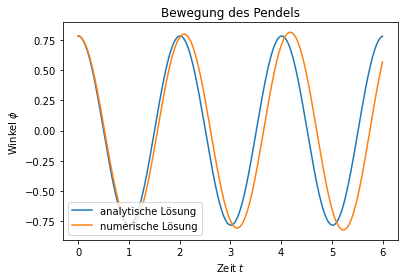

In [11]:
import numpy as np
import matplotlib.pyplot as plt
dt = 0.002
w0 = 0
p0 = (np.pi)/4
g = 9.81
t = np.arange(0, 6, dt)
# Zuerst werden die Variablen erneut eingeführt und die notwendigen Pakete geladen. Dann wird der Plot nach der üblichen Methode gezeigt.
# Dabei wird die in 1a erstellte Liste genutzt.
pAnalytic = p0 * np.cos(np.sqrt(g/L) * t)
pNumeric = plist
fig, ax = plt.subplots()
ax.set_title("Bewegung des Pendels") 
ax.plot(t, pAnalytic, label='analytische Lösung') 
ax.plot(t, pNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $\phi$")
plt.legend(loc=3)
plt.show()

Mir fällt beim Vergleich auf: Die Graphen sind einander recht ähnlich. Die Periodendauer der numerisch berechneten Kurve ist jedoch minimal länger, sodass die Graphen auf Dauer voneinander abweichen. Im beobachteten Zeitfenster ist dies noch nicht so ausschlaggebend, wird im weiteren Verlauf aber signifikanter werden. 

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

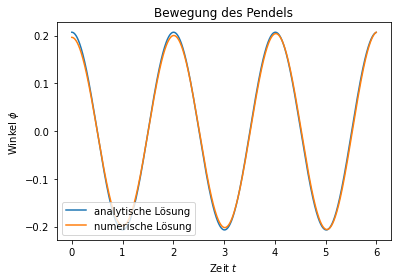

In [12]:
# Alle Schritte aus 1a und 1b werden wiederholt, nur phi0 wird zu pi/16 geändert.
import numpy as np
import matplotlib.pyplot as plt
L = 1
g = 9.81
dt = 0.002
w0 = 0
p0 = (np.pi)/16
wlist = []
plist = []
for i in range(3000):
    pi = p0 + w0 * dt
    wi = w0 - (g/L) * np.sin(p0) * dt
    plist.append(pi)
    wlist.append(wi)
    p0 = pi
    w0 = wi
t = np.arange(0, 6, dt)
pAnalytic = p0 * np.cos(np.sqrt(g/L) * t)
pNumeric = plist 
fig, ax = plt.subplots()
ax.set_title("Bewegung des Pendels") 
ax.plot(t, pAnalytic, label='analytische Lösung') 
ax.plot(t, pNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $\phi$")
plt.legend(loc=3)
plt.show()

Ich beobachte: Die numerische Lösung stimmt fast exakt mit der analytischen überein. Die Periodendauer ist im beobachteten Zeitfenster nicht sichtbar verschieden.